In [7]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Random Forests

In [2]:
iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"]).astype(np.int32)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

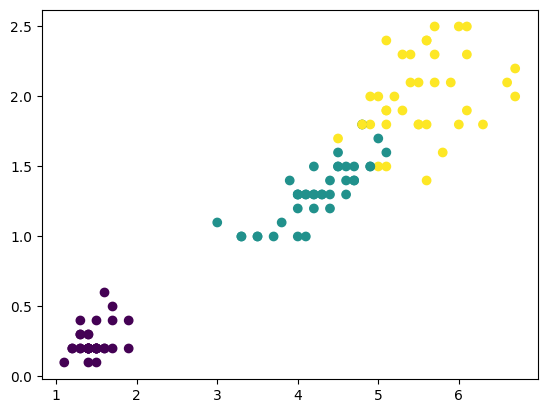

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

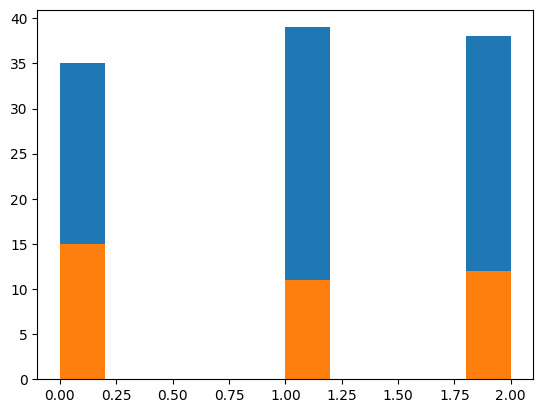

In [5]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

* RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=50, max_leaf_nodes=2, n_jobs=-1, random_state=42)
* RandomForestClassifier(n_estimators=5, max_leaf_nodes=2, n_jobs=-1, random_state=42)

In [8]:
params = [
    (500, 16),
    (50, 2),
    (5, 2)
]
models = [RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, n_jobs=-1, random_state=42)
          for n_estimators, max_leaf_nodes in params]

In [24]:
def score_model(model):
    y_pred = model.predict(X_test)

    precision = metrics.precision_score(y_test, y_pred, average="weighted")
    recall = metrics.recall_score(y_test, y_pred, average="weighted")
    f1 = metrics.f1_score(y_test, y_pred, average="weighted")
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return precision, recall, f1, accuracy

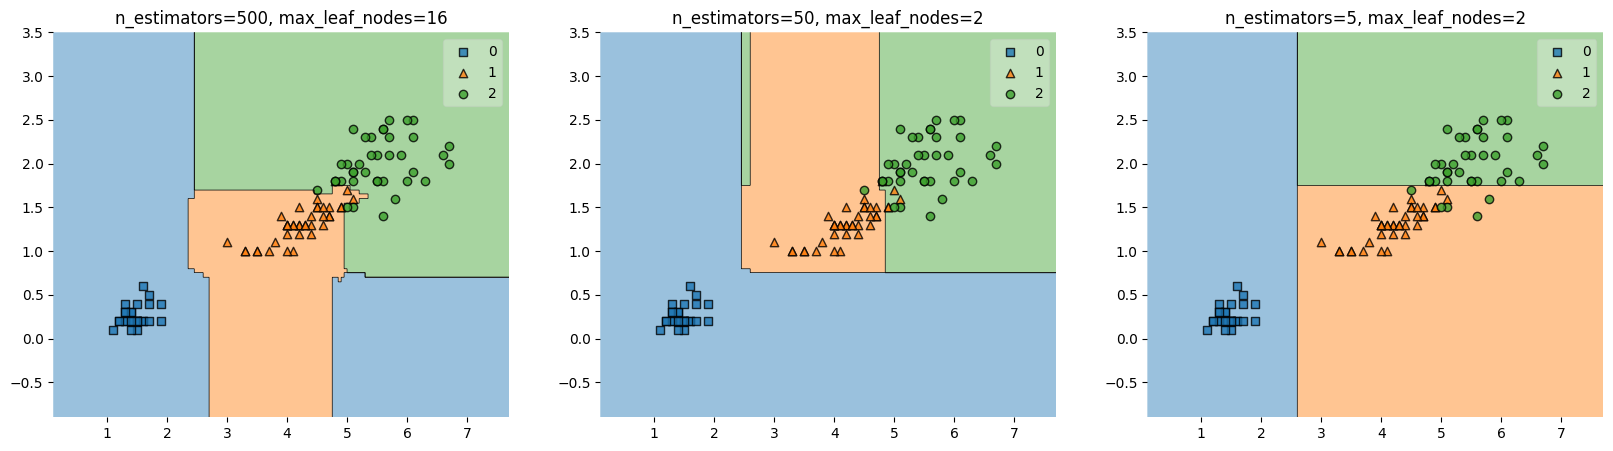

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
df = pd.DataFrame(columns=["n_esimators", "max_leaf_nodes", "precision", "recall", "f1", "accuracy"])

for i, (model, (n_estimators, max_leaf_nodes), ax) in enumerate(zip(models, params, axs.flatten())):
    model.fit(X_train, y_train)
    plot_decision_regions(X_train, y_train, model, legend=1, ax=ax)
    ax.set_title(f"n_estimators={n_estimators}, max_leaf_nodes={max_leaf_nodes}")
    precision, recall, f1, accuracy = score_model(model)
    df.loc[i] = [n_estimators, max_leaf_nodes, precision, recall, f1, accuracy]

In [26]:
df

,n_esimators,max_leaf_nodes,precision,recall,f1,accuracy
0,500.0,16.0,1.0,1.0,1.0,1.0
1,50.0,2.0,1.0,1.0,1.0,1.0
2,5.0,2.0,1.0,1.0,1.0,1.0
